# ***Cambio climático: Análisis de datos de temperatura a largo plazo (1869-2020)***

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
climateData = pd.read_csv("temperaturas.csv", sep=",", parse_dates=True, index_col=2)
climateData

Verificamos los tipos de valores del DataFrame

In [12]:
climateData.dtypes

STATION     object
NAME        object
ACSH       float64
AWND       float64
EVAP       float64
PRCP       float64
PSUN       float64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX       float64
TMIN       float64
TOBS       float64
dtype: object

Establecemos los indices del DataFrame como las fechas

In [14]:
climateData.index

DatetimeIndex(['1869-01-01', '1869-01-02', '1869-01-03', '1869-01-04',
               '1869-01-05', '1869-01-06', '1869-01-07', '1869-01-08',
               '1869-01-09', '1869-01-10',
               ...
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21',
               '2020-11-22', '2020-11-23'],
              dtype='datetime64[ns]', name='DATE', length=55479, freq=None)

**Valores estadísticos del dataset**

In [15]:
climateData.describe()

,ACSH,AWND,EVAP,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS
count,730.000000,9116.000000,2065.000000,55479.000000,4793.000000,55317.000000,38922.000000,2648.000000,55472.000000,55472.000000,2.000000
mean,51.931507,6.105976,0.160814,0.124418,55.721677,0.074420,0.277257,55.849698,61.475988,46.745223,61.000000
std,33.213294,2.649474,0.190389,0.351616,37.086723,0.626274,1.447398,17.032671,18.737895,17.007018,1.414214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-15.000000,60.000000
25%,20.000000,4.250000,0.070000,0.000000,18.000000,0.000000,0.000000,43.000000,46.000000,34.000000,60.500000
50%,50.000000,5.820000,0.150000,0.000000,63.000000,0.000000,0.000000,57.000000,62.000000,47.000000,61.000000
75%,80.000000,7.610000,0.230000,0.050000,92.000000,0.000000,0.000000,71.000000,78.000000,62.000000,61.500000
max,100.000000,22.820000,7.360000,8.280000,100.000000,27.300000,26.000000,92.000000,106.000000,87.000000,62.000000


In [ ]:
climateData = climateData.drop(["STATION", "NAME", "ACSH", "AWND",
                                "EVAP", "PSUN", "TAVG", "TOBS"], axis=1)

In [21]:
climateData.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN
count,55479.000000,55317.000000,38922.000000,55472.000000,55472.000000
mean,0.124418,0.074420,0.277257,61.475988,46.745223
std,0.351616,0.626274,1.447398,18.737895,17.007018
min,0.000000,0.000000,0.000000,2.000000,-15.000000
25%,0.000000,0.000000,0.000000,46.000000,34.000000
50%,0.000000,0.000000,0.000000,62.000000,47.000000
75%,0.050000,0.000000,0.000000,78.000000,62.000000
max,8.280000,27.300000,26.000000,106.000000,87.000000


**Graficamos datos de precipitación, snow y snowdeep en un rango de tiempo de Octubre del 2009 a Septiembre del 2010**

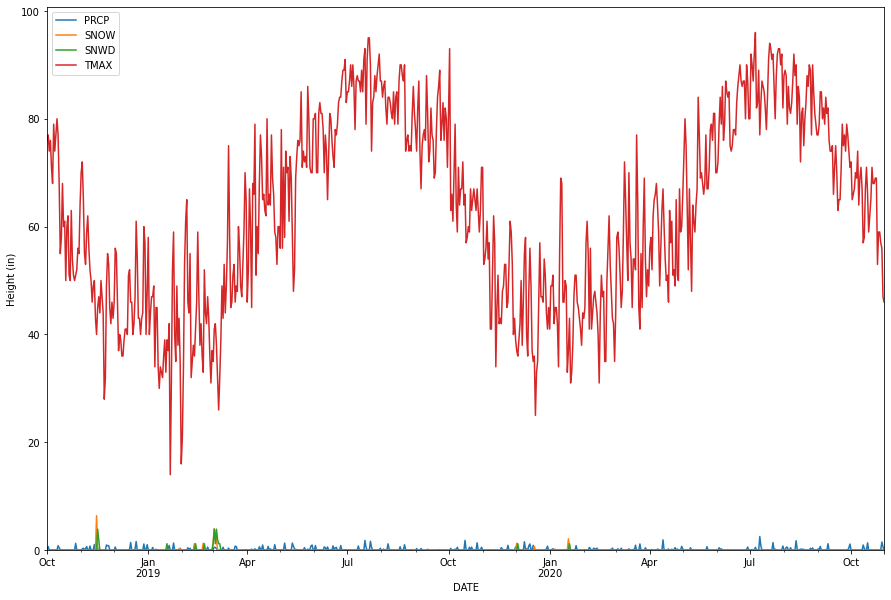

In [51]:
fig = plt.figure(figsize=(15,10))
climateData.loc["2018-10":"2020-10"].PRCP.plot()
climateData.loc["2018-10":"2020-10"].SNOW.plot()
climateData.loc["2018-10":"2020-10"].SNWD.plot()
climateData.loc["2018-10":"2020-10"].TMAX.plot()
plt.ylim(0)
plt.legend()
plt.ylabel("Height (in)")
plt.show()

**Promedios mensuales de los datos climáticos desde 1869 hasta 2020**

In [36]:
averageData = climateData.groupby([lambda x: x.month]).mean()
averageData[["TMIN", "TMAX"]]

,TMIN,TMAX
DATE,,
1,25.695883,38.299660
2,26.148847,39.638015
3,33.148132,47.743633
4,43.093860,59.401096
5,53.406589,70.600638
6,62.742325,79.409430
7,68.348896,84.329372
8,66.978778,82.387521
9,60.331360,75.628289


Convertimos los datos de temperatura Fahrenheit a Celsius

In [37]:
climateData["tMaxC"] = (climateData.TMAX - 32)* 5/9
climateData["tMinC"] = (climateData.TMIN - 32)* 5/9

**Generamos un nuevo DataFrame solo con las columnas TMAX Y TMIN**

In [43]:
tempData = climateData.loc[:, ["tMaxC", "tMinC"]]
tempData.head()

,tMaxC,tMinC
DATE,,
1869-01-01,-1.666667,-7.222222
1869-01-02,-2.777778,-6.111111
1869-01-03,1.666667,-2.777778
1869-01-04,2.777778,1.111111
1869-01-05,6.111111,2.777778


Agrupamos los datos por mes

**Gráfica de la mediana de la temperatura máxima de 1869 hasta 2020**

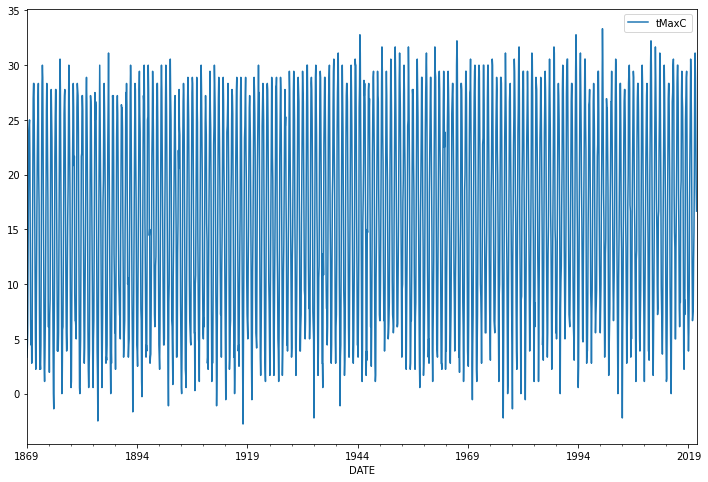

In [79]:
monthlyData = tempData.groupby(climateData.index.to_period("M")).median()
fig = plt.figure(figsize=(12,8))
monthlyData.tMaxC.plot()
plt.legend()
plt.show()

**Temperaturas máximas y mínimas del mes Febrero de 1869 a 2020**

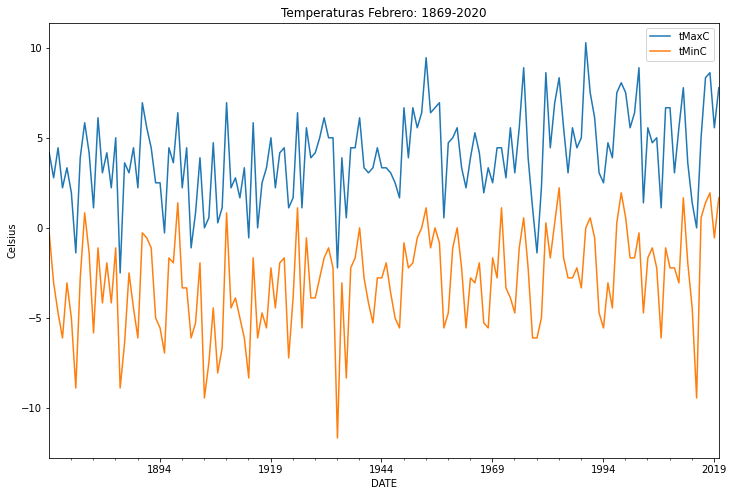

In [86]:
febData = monthlyData[monthlyData.index.month==2]
fig = plt.figure(figsize=(12,8))
febData.tMaxC.plot()
febData.tMinC.plot()
plt.title("Temperaturas Febrero: 1869-2020")
plt.ylabel("Celsius")
plt.legend()
plt.show()

**Gráfica de la diferencia entre Tmax y Tmin para disminuir el ruido de los datos**

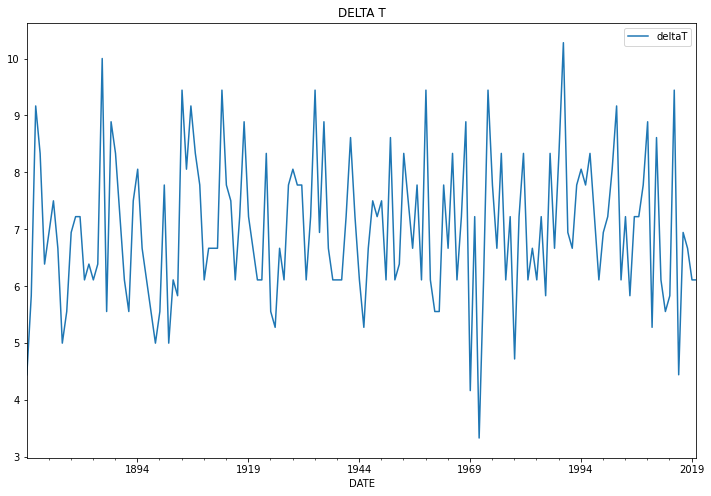

In [81]:
febData = febData.copy()
febData['deltaT'] = febData.tMaxC - febData.tMinC
fig = plt.figure(figsize=(12,8))
febData['deltaT'].plot()
plt.legend()
plt.title("DELTA T")
plt.show()

**Graficamos los datos de Septiembre de 1869 a 2020**

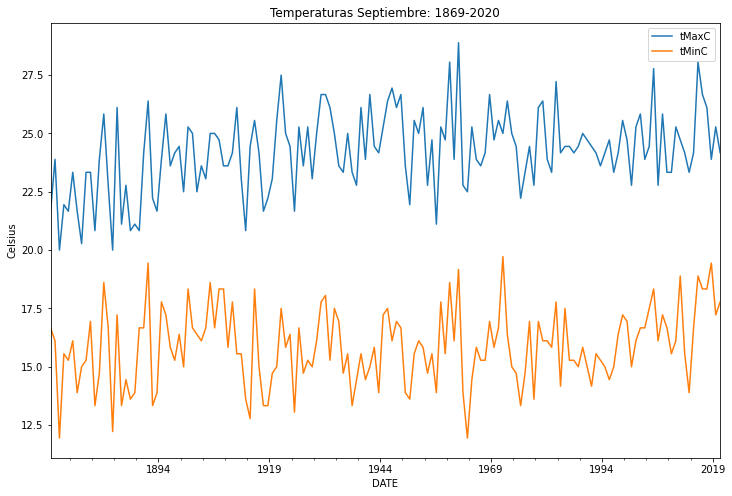

In [88]:
sepData = monthlyData[monthlyData.index.month==9]
fig = plt.figure(figsize=(12,8))
sepData.tMaxC.plot()
sepData.tMinC.plot()
plt.title("Temperaturas Septiembre: 1869-2020")
plt.ylabel("Celsius")
plt.legend()
plt.show()

**Importamos librería scikit learn para construir modelo de regresión**

In [91]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# **MODELO DE REGRESIÓN LINEAL**

In [92]:
sepRegr = linear_model.LinearRegression()

In [94]:
sepTrain = np.array([[i] for i in range(sepData.shape[0])])
sepRegr.fit(sepTrain, sepData.tMaxC)

LinearRegression()

**PREDICCIONES TEMPERATURAS**

In [95]:
sepPred = sepRegr.predict(sepTrain)
sepData = sepData.copy()
sepData['tMaxPredict'] = sepPred

In [96]:
sepData

,tMaxC,tMinC,tMaxPredict
DATE,,,
1869-09,21.666667,16.666667,23.121990
1870-09,23.888889,16.111111,23.136505
1871-09,20.000000,11.944444,23.151019
1872-09,21.944444,15.555556,23.165534
1873-09,21.666667,15.277778,23.180048
...,...,...,...
2016-09,26.666667,18.333333,25.255624
2017-09,26.111111,18.333333,25.270139
2018-09,23.888889,19.444444,25.284653


**VISUALIZACIÓN DE PREDICCIONES DE TEMPERATURA EN SEPTIEMBRE**

Notemos que sí existe una tendencia de regresión para el aumento de temperatura a medida que avanzan los años.

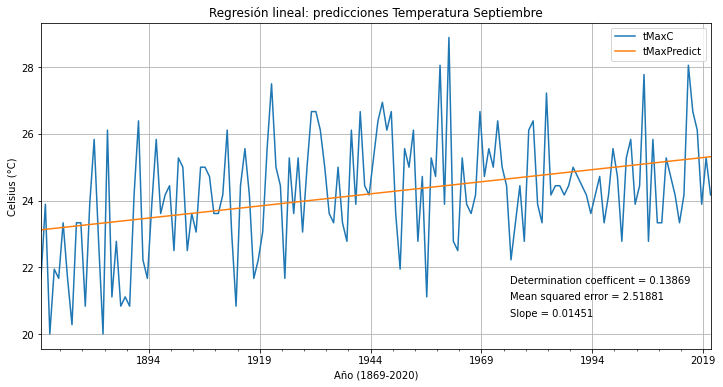

In [114]:
fig, ax = plt.subplots(figsize=(12,6))
mse = mean_squared_error(sepData.tMaxC, sepPred) #MSE
r2 = r2_score(sepData.tMaxC, sepPred) #R2
sepData.tMaxC.plot()
sepData.tMaxPredict.plot()
ax.grid()
ax.set_title("Regresión lineal: predicciones Temperatura Septiembre")
ax.set_ylabel("Celsius (°C)")
ax.set_xlabel("Año (1869-2020)")
ax.legend()
ax.text(0.7, 0.1, "Slope = %.5f"%sepRegr.coef_[0], transform=ax.transAxes)
ax.text(0.7, 0.15, "Mean squared error = %.5f"%mse, transform=ax.transAxes)
ax.text(0.7, 0.20, "Determination coefficent = %.5f"%r2, transform=ax.transAxes)
plt.show()

**VISUALIZACIÓN DE PREDICCIONES DE TEMPERATURA EN FEBRERO**

In [121]:
febRegr = linear_model.LinearRegression()
febTrain = np.array([[i] for i in range(febData.shape[0])])
febRegr.fit(febTrain, febData.tMaxC)

febPred = febRegr.predict(febTrain)
febData = febData.copy()
febData['tMaxPredict'] = febPred

In [122]:
febData

,tMaxC,tMinC,tMaxPredict
DATE,,,
1869-02,4.166667,-0.277778,2.509388
1870-02,2.777778,-3.055556,2.529693
1871-02,4.444444,-4.722222,2.549998
1872-02,2.222222,-6.111111,2.570303
1873-02,3.333333,-3.055556,2.590607
...,...,...,...
2016-02,5.000000,0.555556,5.494188
2017-02,8.333333,1.388889,5.514493
2018-02,8.611111,1.944444,5.534798


Notemos que sí existe una tendencia de regresión para el aumento de temperatura a medida que avanzan los años.

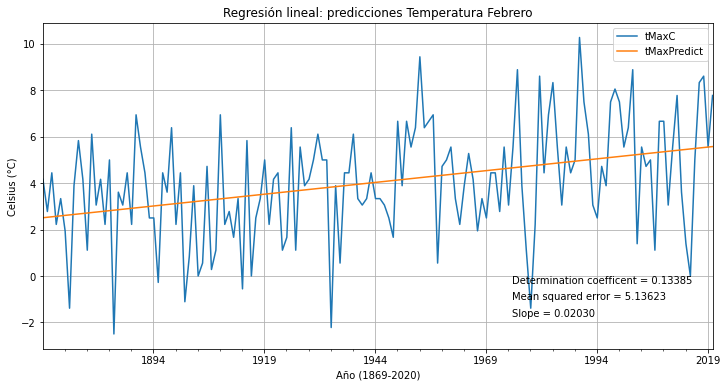

In [123]:
fig, ax = plt.subplots(figsize=(12,6))
mse = mean_squared_error(febData.tMaxC, febPred) #MSE
r2 = r2_score(febData.tMaxC, febPred) #R2
febData.tMaxC.plot()
febData.tMaxPredict.plot()
ax.grid()
ax.set_title("Regresión lineal: predicciones Temperatura Febrero")
ax.set_ylabel("Celsius (°C)")
ax.set_xlabel("Año (1869-2020)")
ax.legend()
ax.text(0.7, 0.1, "Slope = %.5f"%febRegr.coef_[0], transform=ax.transAxes)
ax.text(0.7, 0.15, "Mean squared error = %.5f"%mse, transform=ax.transAxes)
ax.text(0.7, 0.20, "Determination coefficent = %.5f"%r2, transform=ax.transAxes)
plt.show()

*Notemos que en febrero hay un mayor aumento de la temperatura máxima (siendo época de invierno), donde la pendiente se incrementa en un factor de 0.02030 a medida que transcurre un año.*

**Analizamos rangos de tiempo**

**Creamos una función para analizar diferentes periodos de tiempo:**

In [161]:
import scipy.stats as st

def plotPeriod(start: str, end: str, color: str)->None:
  periodData = climateData[start:end]

  per10List = []
  medianList = []
  per90List = []

  for m in range(12):
    monthlyData = periodData[periodData.index.month==m]
    per10 = st.scoreatpercentile(monthlyData.tMaxC, 10)
    per50 = st.scoreatpercentile(monthlyData.tMaxC, 50)
    per90 = st.scoreatpercentile(monthlyData.tMaxC, 90)
    per10List.append(per10)
    medianList.append(per50)
    per90List.append(per90)

  plt.plot(range(12), per10List, alpha=0.5, ls="--", c=color)
  plt.plot(range(12), medianList, lw=2, c=color, label="Desde %s hasta %s"%(start,end))
  plt.plot(range(12), per90List, alpha=0.5, ls="-.", c=color)    
  plt.ylabel("Celsius (°C)")
  plt.xlabel("Meses")

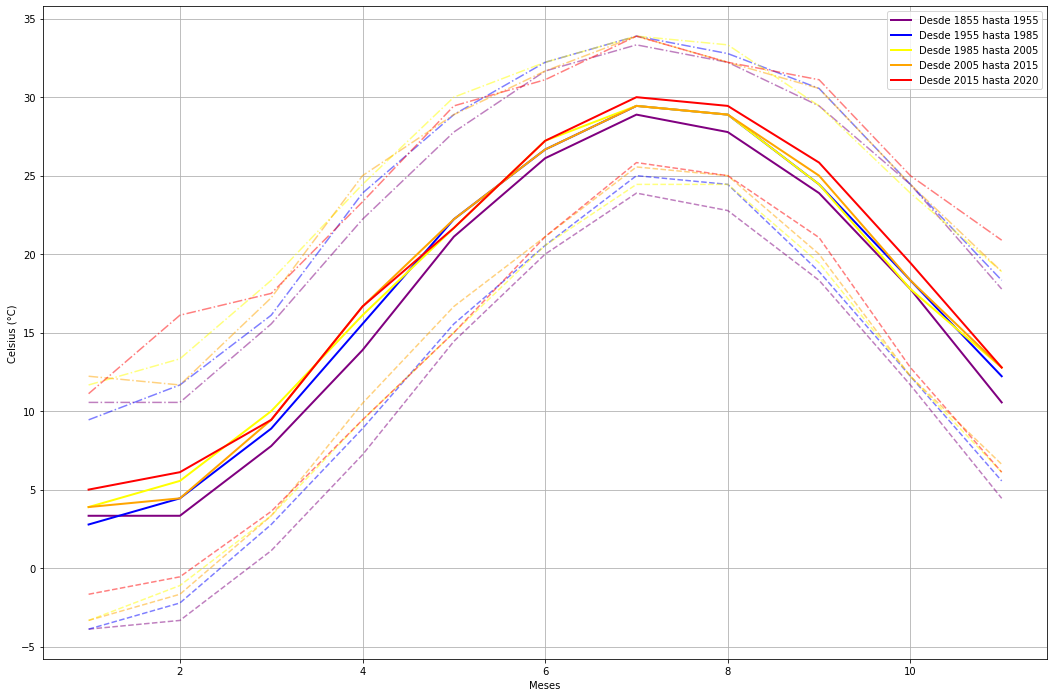

In [162]:
fig = plt.figure(figsize=(18, 12))
plotPeriod("1855", "1955", "purple")
plotPeriod("1955", "1985", "blue")
plotPeriod("1985", "2005", "yellow")
plotPeriod("2005", "2015", "orange")
plotPeriod("2015", "2020", "red")
plt.legend()
plt.grid()
plt.show()